# Exploración del Dataset
<br>
<br>

<img alt="Colaboratory logo" src="explorar_datasets.png" height = "600" width = "600">

In [2]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import warnings 
warnings.filterwarnings('ignore')

# Dataset

In [23]:
df_employee = pd.read_csv("./datasets/employee_data.csv")
df_employee.loc[635:650, "annual_salary"] = np.nan
df_employee

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  tax_file_no  
0          64598.0          NaN  
1         124103.0          NaN  
2         100324.0          NaN  
3         144957.0          NaN  
4         137659.0          NaN  
..             ...          ...  
995        66592.0          NaN  
996       127966.0          NaN  
997        60712.0          NaN  
998       103606.0          NaN  
999       127405.0          NaN  

[1000 rows x 8 columns]

In [5]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             1000 non-null   int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             793 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      983 non-null    float64
 7   tax_file_no        0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [6]:
df_employee.isnull().sum()

number                  0
first_name              1
last_name               1
gender                207
birth_date              1
employment_status     189
annual_salary          17
tax_file_no          1000
dtype: int64

## Porcentaje de datos nulos

In [7]:
rows = df_employee.shape[0]
columns = df_employee.shape[1]
print(rows, columns)

1000 8


In [9]:
cell_count = rows * columns
cell_count

8000

In [16]:
number_of_nulls = df_employee.isnull().sum().sum()
percentage_of_missing = (number_of_nulls/cell_count)*100
print(f"Porcentage de valores nulos en el dataset: ---> {percentage_of_missing}%")
print(f"Cantidad de valores nulos:--------------------> {number_of_nulls}")

Porcentage de valores nulos en el dataset: ---> 17.7%
Cantidad de valores nulos:--------------------> 1416


## Eliminar datos nulos de columnas

Las columnas que sean irrelevantes desde el punto de vista del contexto, o que tengan demasiado valores nulos y no puedan ser "imputados" se deben remover de los datos

In [17]:
df_employee.isnull().sum()

number                  0
first_name              1
last_name               1
gender                207
birth_date              1
employment_status     189
annual_salary          17
tax_file_no          1000
dtype: int64

In [18]:
df_employee.dropna(axis = "columns", how = "all")

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  
0          64598.0  
1         124103.0  
2         100324.0  
3         144957.0  
4         137659.0  
..             ...  
995        66592.0  
996       127966.0  
997        60712.0  
998       103606.0  
999       127405.0  

[1000 rows x 7 columns]

In [22]:
df_employee.drop(labels = ["tax_file_no"], axis = 1)

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  
0          64598.0  
1         124103.0  
2         100324.0  
3         144957.0  
4         137659.0  
..             ...  
995        66592.0  
996       127966.0  
997        60712.0  
998       103606.0  
999       127405.0  

[1000 rows x 7 columns]

## Remover renglones

Podemos remover renglones que tengan cierta cantidad datos nulos.

In [23]:
df_employee.dropna(axis = "index", how = "all")

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  tax_file_no  
0          64598.0          NaN  
1         124103.0          NaN  
2         100324.0          NaN  
3         144957.0          NaN  
4         137659.0          NaN  
..             ...          ...  
995        66592.0          NaN  
996       127966.0          NaN  
997        60712.0          NaN  
998       103606.0          NaN  
999       127405.0          NaN  

[1000 rows x 8 columns]

In [27]:
df_employee.dropna(axis = "index", thresh = 2)

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  tax_file_no  
0          64598.0          NaN  
1         124103.0          NaN  
2         100324.0          NaN  
3         144957.0          NaN  
4         137659.0          NaN  
..             ...          ...  
995        66592.0          NaN  
996       127966.0          NaN  
997        60712.0          NaN  
998       103606.0          NaN  
999       127405.0          NaN  

[999 rows x 8 columns]

## Reemplazar valores nulos

Para eso hay diversas técnicas y dependerá tanto del contexto como del tipo de dato que estemos analizando,

In [51]:
def plot_frecuancy_distribution(category = str, df = pd.DataFrame(), 
                                font_size_y = 12, fontsize_x = 12, font_size_title = 12):
    
    cat_count = df[category].value_counts()
    sns.set(style = "darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha = 0.6)
    plt.title(f"Distribucion de frecuencias de la {category}", fontsize = font_size_title)
    plt.ylabel("Conteos", fontsize = font_size_y)
    plt.xlabel(category, fontsize = fontsize_x)
    plt.xticks(rotation = 0)
    plt.show();

### Columna Gender

In [55]:
print("Valores nulos de la variable Gender:", df_employee["gender"].isnull().sum())

Valores nulos de la variable Gender: 207


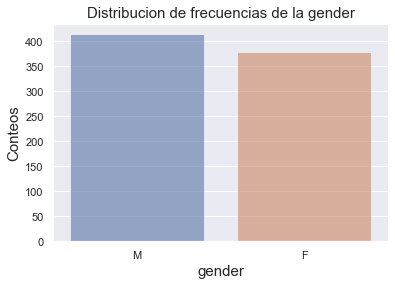

In [53]:
plot_frecuancy_distribution("gender", df_employee, font_size_y = 15, 
                            fontsize_x = 15, font_size_title = 15)

In [59]:
df_employee.gender.fillna("U", inplace = True)

In [60]:
df_employee["gender"].isnull().sum()

0

#### corregir utilizando la función fillna de pandas

#### Aplicar una función personalizada

In [68]:
df_employee

number first_name last_name gender  birth_date employment_status  \
0       483     Lenord      Kihn      M  1994-07-01               NaN   
1       478      Palma    Beahan      F  1972-05-06                PE   
2       348     Hebert    Muller      M  1990-09-04                PE   
3       757   Virginia   Ullrich      M  1991-09-23                PE   
4       937       Roby    Hudson      M  1997-01-15               NaN   
..      ...        ...       ...    ...         ...               ...   
995     712       Dann    Crooks    NaN  1983-12-25                CA   
996     132      Maxim       Orn      M  1971-03-01                CA   
997     126   Kimberli    Walter      M  1976-03-07                CA   
998     277    Talmage   Bartell      F  1989-02-19                PE   
999     960     Laurie    Nienow      M  1993-04-01                PE   

     annual_salary  tax_file_no  
0          64598.0          NaN  
1         124103.0          NaN  
2         100324.0          NaN  
3         144957.0          NaN  
4         137659.0          NaN  
..             ...          ...  
995        66592.0          NaN  
996       127966.0          NaN  
997        60712.0          NaN  
998       103606.0          NaN  
999       127405.0          NaN  

[1000 rows x 8 columns]

In [76]:
df_employee.dropna(axis='index', thresh = 2, inplace = True)

In [77]:
def clasificar_genero_por_nombre(nombre:str, gender):
    
    if not pd.isna(gender):
        return gender
    
    if nombre.endswith("o") or nombre.endswith("r") or nombre.endswith("d"):
        return "M"
    
    else:
        return "F"

In [78]:
df_employee["gender"] = df_employee.apply(lambda row: clasificar_genero_por_nombre(row["first_name"], 
                                                                                   row["gender"]), 
                                          axis=1)

In [79]:
df_employee["gender"].isnull().sum()

0

### Employment status

In [81]:
df_employee.groupby(["employment_status"]).size()

employment_status
CA    109
PE    599
TE    103
dtype: int64

In [67]:
def plot_pie_chart(category, df, shadow = False, fig_size = (5, 5), explode = (0, 0.1, 0)):
    
    labels = df[category].astype("category").cat.categories.tolist()
    counts = df[category].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    
    fig1, ax1 = plt.subplots(figsize = fig_size)
    explode = explode
    ax1.pie(sizes, labels = labels, explode = explode, shadow = shadow, autopct = "%1.1f%%")
    plt.show();

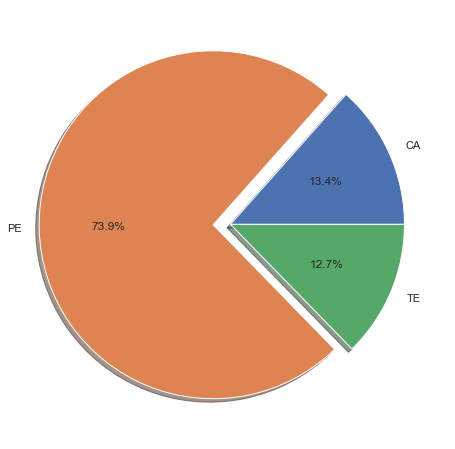

In [113]:
plot_pie_chart("employment_status", df_employee, shadow = True, fig_size = (8, 8), explode = (0, 0.1, 0))

In [149]:
df_employee["employment_status"].fillna("PE", inplace = True)

## annual_salary

In [115]:
df_employee["annual_salary"].isnull().sum()

16

In [123]:
salario_promedio = df_employee.annual_salary.mean()
#salario_promedio = df_employee["annual_salary"].mean()
coef_var = df_employee["annual_salary"].std()/df_employee["annual_salary"].mean()*100
print(f"Salario_promedio: -----------> {salario_promedio}")
print(f"Coeficiente de variacion: ---> {coef_var}%")

Salario_promedio: -----------> 102059.88708036623
Coeficiente de variacion: ---> 27.046625338576856%


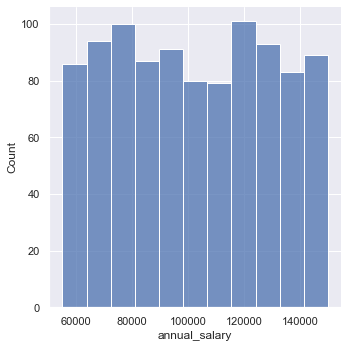

In [124]:
sns.displot(df_employee["annual_salary"]);

In [133]:
df_employee["annual_salary_2_mean"] = df_employee["annual_salary"].fillna(salario_promedio)

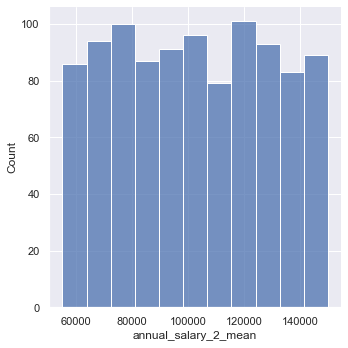

In [134]:
sns.displot(df_employee["annual_salary_2_mean"]);

# Manipular Strings

In [142]:
df_salary_by_employment_status = df_employee.groupby(["employment_status"])[["annual_salary"]].mean()
df_salary_by_employment_status

annual_salary
employment_status               
CA                 109192.419048
PE                 101851.786802
TE                 104357.465347

In [143]:
df_salary_by_employment_status = df_employee.groupby(["employment_status"]).agg({"annual_salary": "mean"})
df_salary_by_employment_status

annual_salary
employment_status               
CA                 109192.419048
PE                 101851.786802
TE                 104357.465347

In [144]:
df_salary_by_employment_status.loc["CA", "annual_salary"]

109192.41904761904

In [150]:
def fill_salary_by_status(row, df_salary_by_employment_status):
    
    salary, emp_status = row["annual_salary"], row["employment_status"]
    
    if not pd.isna(salary):
        return salary
    
    value = df_salary_by_employment_status.loc[emp_status, "annual_salary"]
    
    return value

In [ ]:
salary= row["annual_salary"]
emp_status = row["employment_status"]

In [152]:
df_employee["annual_salary"] = df_employee.apply(fill_salary_by_status, axis = 1, args = (df_salary_by_employment_status,))

In [163]:
df_employee["annual_salary"] = df_employee["annual_salary"].apply(lambda x: x.replace("PE", "0") if x == "PE" else x)
df_employee["annual_salary"] = df_employee["annual_salary"].astype(float)

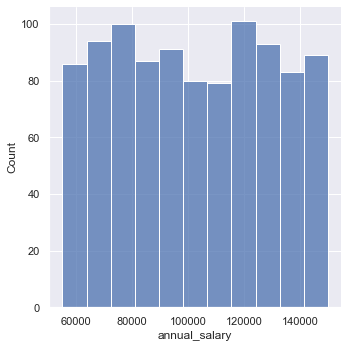

In [166]:
df_employee_2 = df_employee[df_employee["annual_salary"] != 0]
sns.displot(df_employee_2["annual_salary"]);

# Manipular Fechas

In [4]:
df_employee.head()

number first_name last_name gender  birth_date employment_status  \
0     483     Lenord      Kihn      M  1994-07-01               NaN   
1     478      Palma    Beahan      F  1972-05-06                PE   
2     348     Hebert    Muller      M  1990-09-04                PE   
3     757   Virginia   Ullrich      M  1991-09-23                PE   
4     937       Roby    Hudson      M  1997-01-15               NaN   

   annual_salary  tax_file_no  
0        64598.0          NaN  
1       124103.0          NaN  
2       100324.0          NaN  
3       144957.0          NaN  
4       137659.0          NaN

In [24]:
df_employee["birth_date"] = pd.to_datetime(df_employee["birth_date"])
df_employee["birth_date"].dtype

dtype('<M8[ns]')

In [25]:
df_employee.dtypes

number                        int64
first_name                   object
last_name                    object
gender                       object
birth_date           datetime64[ns]
employment_status            object
annual_salary               float64
tax_file_no                 float64
dtype: object

In [26]:
df_employee["birth_date"] = df_employee["birth_date"].astype("datetime64")

In [27]:
from datetime import date, timedelta, datetime

In [28]:
fecha_actual = datetime.today()

In [31]:
df_employee["age"] = (fecha_actual - df_employee["birth_date"]).dt.days

In [32]:
df_employee["age"]

0      10025.0
1      18116.0
2      11421.0
3      11037.0
4       9096.0
        ...   
995    13866.0
996    18548.0
997    16715.0
998    11983.0
999    10481.0
Name: age, Length: 1000, dtype: float64

# Data Set de Aviones

In [35]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

In [36]:
df_flights.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2014      1    1       1.0       96.0     235.0       70.0      AS  N508AS   
1  2014      1    1       4.0       -6.0     738.0      -23.0      US  N195UW   
2  2014      1    1       8.0       13.0     548.0       -4.0      UA  N37422   
3  2014      1    1      28.0       -2.0     800.0      -23.0      US  N547UW   
4  2014      1    1      34.0       44.0     325.0       43.0      AS  N762AS   

   flight origin dest  air_time  distance  hour  minute  
0     145    PDX  ANC     194.0      1542   0.0     1.0  
1    1830    SEA  CLT     252.0      2279   0.0     4.0  
2    1609    PDX  IAH     201.0      1825   0.0     8.0  
3     466    PDX  CLT     251.0      2282   0.0    28.0  
4     121    SEA  ANC     201.0      1448   0.0    34.0

# Exploración del dataset

In [37]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


In [76]:
df_flights.describe().T

count         mean          std     min     25%     50%     75%  \
year       162049.0  2014.000000     0.000000  2014.0  2014.0  2014.0  2014.0   
month      162049.0     6.605027     3.324399     1.0     4.0     7.0     9.0   
day        162049.0    15.749890     8.789417     1.0     8.0    16.0    23.0   
dep_time   161192.0  1278.283755   522.583793     1.0   831.0  1217.0  1721.0   
dep_delay  161192.0     6.133859    29.112035   -37.0    -5.0    -2.0     5.0   
arr_time   161061.0  1482.501282   523.958781     1.0  1127.0  1517.0  1918.0   
arr_delay  160748.0     2.240868    31.191037   -67.0   -12.0    -4.0     7.0   
flight     162049.0  1357.356725  1495.271031     2.0   408.0   694.0  1726.0   
air_time   160748.0   152.588511    72.547469    18.0   103.0   129.0   199.0   
distance   162049.0  1204.514634   653.150062    93.0   689.0   991.0  1660.0   
hour       161192.0    12.479515     5.232476     0.0     8.0    12.0    17.0   
minute     161192.0    30.332244    18.061569     0.0    14.0    30.0    47.0   

              max  
year       2014.0  
month        12.0  
day          31.0  
dep_time   2400.0  
dep_delay  1553.0  
arr_time   2400.0  
arr_delay  1539.0  
flight     6527.0  
air_time    422.0  
distance   2724.0  
hour         24.0  
minute       59.0

In [74]:
df_flights.describe(include = "O").T

count unique     top    freq
carrier  162049     11      AS   62460
tailnum  161801   3022  N223AG     755
origin   162049      2     SEA  108714
dest     162049     71     SFO   12809

# Visualización de variables categóricas

In [38]:
df_flights["carrier"].unique()

array(['AS', 'US', 'UA', 'DL', 'AA', 'F9', 'VX', 'OO', 'WN', 'B6', 'HA'],
      dtype=object)

## Box Plot

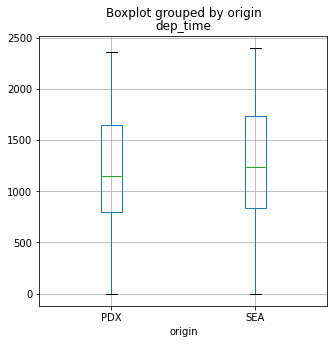

In [44]:
df_flights.boxplot("dep_time", "origin", rot = 0, figsize = (5, 5));

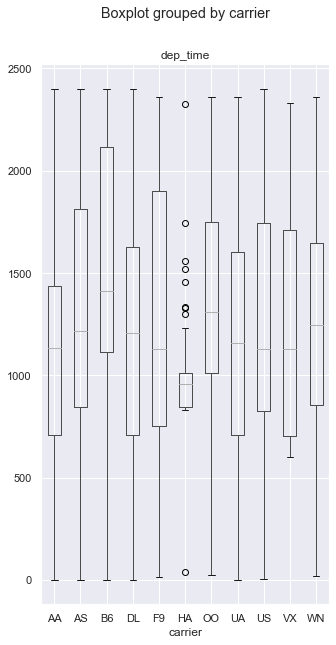

In [66]:
df_flights.boxplot("dep_time", "carrier", rot = 0, figsize = (5, 10));

## Frecuencias de Distribución

Esto nos permite el número de ocurrencias de cada categoría de una variable.

In [47]:
df_flights.groupby(["carrier"]).size().sort_values(ascending = True)

carrier
HA     1095
F9     2698
VX     3272
B6     3540
US     5946
AA     7586
UA    16671
DL    16716
OO    18710
WN    23355
AS    62460
dtype: int64

In [52]:
df_flights["carrier"].value_counts(ascending = True).index

Index(['HA', 'F9', 'VX', 'B6', 'US', 'AA', 'UA', 'DL', 'OO', 'WN', 'AS'], dtype='object')

In [53]:
df_flights["carrier"].value_counts(ascending = True).values

array([ 1095,  2698,  3272,  3540,  5946,  7586, 16671, 16716, 18710,
       23355, 62460], dtype=int64)

In [63]:
def plot_frecuency_distribution(category, df, title_, style):
    
    cat_count = df[category].value_counts()
    sns.set(style = style)
    sns.barplot(cat_count.index, cat_count.values, alpha = 0.9)
    plt.title(title_)
    plt.xlabel(category)
    plt.ylabel("Conteos")
    plt.show()

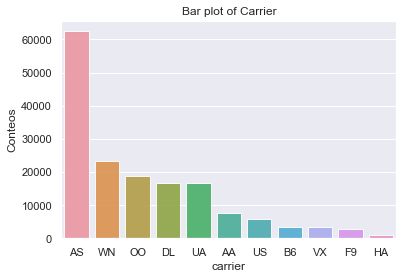

In [64]:
plot_frecuency_distribution("carrier", df_flights, 
                            title_ = "Bar plot of Carrier", 
                            style = "darkgrid")

## Pie Chart

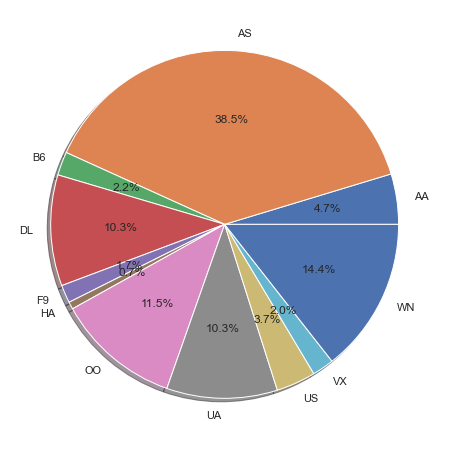

In [71]:
explode = (0,0,0,0,0,0,0,0,0,0,0)

plot_pie_chart("carrier", 
               df_flights, 
               shadow = True, 
               fig_size = (8, 8),
               explode = explode)

# Seleccionar las variables categóricas

A continuación vemos que las posibles variables categóricas son las que son de tipo "object". Las demás son numéricas.

In [79]:
df_flights.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object

In [80]:
df_flights[["carrier", "tailnum", "origin", "dest"]]

carrier tailnum origin dest
0           AS  N508AS    PDX  ANC
1           US  N195UW    SEA  CLT
2           UA  N37422    PDX  IAH
3           US  N547UW    PDX  CLT
4           AS  N762AS    SEA  ANC
...        ...     ...    ...  ...
162044      UA  N477UA    PDX  IAH
162045      DL  N137DL    SEA  ATL
162046      AS  N530AS    SEA  SAN
162047      US     NaN    PDX  PHX
162048      WN  N790SW    SEA  SMF

[162049 rows x 4 columns]

## Dataframe de solo variables categóricas

In [81]:
cat_df_flights = df_flights.select_dtypes(include = "O").copy()
cat_df_flights = df_flights.select_dtypes(include = ["object"]).copy()
cat_df_flights

carrier tailnum origin dest
0           AS  N508AS    PDX  ANC
1           US  N195UW    SEA  CLT
2           UA  N37422    PDX  IAH
3           US  N547UW    PDX  CLT
4           AS  N762AS    SEA  ANC
...        ...     ...    ...  ...
162044      UA  N477UA    PDX  IAH
162045      DL  N137DL    SEA  ATL
162046      AS  N530AS    SEA  SAN
162047      US     NaN    PDX  PHX
162048      WN  N790SW    SEA  SMF

[162049 rows x 4 columns]

## Detección e imputación de valores nulos

In [84]:
cat_df_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [85]:
cat_df_flights.isnull().values.sum()

248

In [86]:
cat_df_flights.isnull().sum().sum()

248

### Imputación

Esto es un proceso que consiste en llenar los valores faltantes mediante algún método "razonable".
Para variables numéricas una de las técnicas es utilizar un estadístico como el promedio o la mediana. Para nuestro caso de variables categóricas vamos a reemplazar los valores nulos con el valor más común, en estadística es llamado la "moda".


## One-Hot-Encoding

Si bien esta técnica resuelve el problema de tener pesos desiguales, sin embargo, esto no será muy útil cuando se tienen muchas categorías ya que esto agregaría demasiadas columnas y podríamos caer en la [maldición de la dimensionalidad (Curse of dimensionality)](https://en.wikipedia.org/wiki/Curse_of_dimensionality)


<img alt="Colaboratory logo" src="dummy.jpg" height = "400" width = "400">

## Utilizando Pandas

Utilizamos la función *get_dummies*

In [88]:
cat_df_flights.head()

carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC

In [89]:
cat_df_flights_onehot = pd.get_dummies(cat_df_flights,
                                       columns = ["carrier", "origin"],
                                       prefix = ["carrier", "origin"])

In [90]:
cat_df_flights_onehot

tailnum dest  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0       N508AS  ANC           0           1           0           0   
1       N195UW  CLT           0           0           0           0   
2       N37422  IAH           0           0           0           0   
3       N547UW  CLT           0           0           0           0   
4       N762AS  ANC           0           1           0           0   
...        ...  ...         ...         ...         ...         ...   
162044  N477UA  IAH           0           0           0           0   
162045  N137DL  ATL           0           0           0           1   
162046  N530AS  SAN           0           1           0           0   
162047     NaN  PHX           0           0           0           0   
162048  N790SW  SMF           0           0           0           0   

        carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  \
0                0           0           0           0           0   
1                0           0           0           0           1   
2                0           0           0           1           0   
3                0           0           0           0           1   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
162044           0           0           0           1           0   
162045           0           0           0           0           0   
162046           0           0           0           0           0   
162047           0           0           0           0           1   
162048           0           0           0           0           0   

        carrier_VX  carrier_WN  origin_PDX  origin_SEA  
0                0           0           1           0  
1                0           0           0           1  
2                0           0           1           0  
3                0           0           1           0  
4                0           0           0           1  
...            ...         ...         ...         ...  
162044           0           0           1           0  
162045           0           0           0           1  
162046           0           0           0           1  
162047           0           0           1           0  
162048           0           1           0           1  

[162049 rows x 15 columns]

## Target Encoding

Supongamos que la variable "*dep_time*" es nuestra variable objetivo (target).

In [93]:
cat_df_flights_encoding = cat_df_flights.copy()
cat_df_flights_encoding["target"] = df_flights["dep_time"]
cat_df_flights_encoding.head()

carrier tailnum origin dest  target
0      AS  N508AS    PDX  ANC     1.0
1      US  N195UW    SEA  CLT     4.0
2      UA  N37422    PDX  IAH     8.0
3      US  N547UW    PDX  CLT    28.0
4      AS  N762AS    SEA  ANC    34.0

In [95]:
na_fill_values = cat_df_flights_encoding.target.mean()
cat_df_flights_encoding.fillna(na_fill_values, inplace = True)

In [97]:
encodings = cat_df_flights_encoding.groupby("carrier").agg({"target":"mean"}).reset_index()
encodings

carrier       target
0       AA  1139.753005
1       AS  1305.577368
2       B6  1505.048686
3       DL  1215.535727
4       F9  1246.846017
5       HA   950.421264
6       OO  1353.848156
7       UA  1218.665926
8       US  1247.354458
9       VX  1247.787108
10      WN  1273.996935

In [98]:
cat_df_flights_target_encoding = cat_df_flights_encoding.merge(encodings, how="left", on="carrier", suffixes=("", "carrier_mean"))

In [99]:
cat_df_flights_target_encoding

carrier      tailnum origin dest       target  targetcarrier_mean
0           AS       N508AS    PDX  ANC     1.000000         1305.577368
1           US       N195UW    SEA  CLT     4.000000         1247.354458
2           UA       N37422    PDX  IAH     8.000000         1218.665926
3           US       N547UW    PDX  CLT    28.000000         1247.354458
4           AS       N762AS    SEA  ANC    34.000000         1305.577368
...        ...          ...    ...  ...          ...                 ...
162044      UA       N477UA    PDX  IAH  2357.000000         1218.665926
162045      DL       N137DL    SEA  ATL  2359.000000         1215.535727
162046      AS       N530AS    SEA  SAN  1278.283755         1305.577368
162047      US  1278.283755    PDX  PHX  1278.283755         1247.354458
162048      WN       N790SW    SEA  SMF  1278.283755         1273.996935

[162049 rows x 6 columns]